In [1]:
import pandas as pd
import os 
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyranges import PyRanges
import pairtools
import pairtools.lib.headerops as phead

In [2]:
def load_pairs(fpath, comment_char="#"):
    """Loads a pairs table from a tab-separated file.

    Args:
        fpath (str): The file path to the pairs table.
        comment_char (str, optional): The character indicating comment lines. 
                                     Defaults to "#".

    Returns:
        pd.DataFrame: A Pandas DataFrame containing the pairs table data.
    """
    header = phead.get_header(open(fpath))[0][-1]
    header = header.replace("#columns: ", "")
    header = header.split(" ")
    
    df = pd.read_csv(fpath, 
                     sep='\t', 
                     header=None, 
                     names=header, 
                     comment="#")
    return df

# Unfiltered, but unique single-cell data

In [3]:
dpath = "/scratch/indikar_root/indikar1/shared_data/single_cell/single_cell/direct/"

file_list = glob.glob(f"{dpath}*") 
file_list[:10]

['/scratch/indikar_root/indikar1/shared_data/single_cell/single_cell/direct/o1b74.GRCm39.filtered.pairs',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/single_cell/direct/o4b83.GRCm39.filtered.pairs',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/single_cell/direct/o4b89.GRCm39.filtered.pairs',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/single_cell/direct/o4b03.GRCm39.filtered.pairs',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/single_cell/direct/o2b63.GRCm39.filtered.pairs',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/single_cell/direct/o3b13.GRCm39.filtered.pairs',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/single_cell/direct/o3b34.GRCm39.filtered.pairs',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/single_cell/direct/o4b93.GRCm39.filtered.pairs',
 '/scratch/indikar_root/indikar1/shared_data/single_cell/single_cell/direct/o2b04.GRCm39.filtered.pairs',
 '/scratch/indikar_root/indikar1/shared_data/s

# Chromosome 2

In [4]:
chrom = "1"
df = []

for i, file_path in enumerate(file_list):    
    
    if i % 25 == 0:
        print(f"Processed {i} cells...")
    file_id = os.path.basename(file_path).split(".")[0]
    cell_id = file_id[2:5]
    sample_id = file_id[:2]
    
    pdf = load_pairs(file_path)
    pdf = pdf[(pdf['chrom1'].astype(str) == chrom) & (pdf['chrom2'].astype(str) == chrom)]
    
    # unique only
    pdf = pdf.drop_duplicates(subset=['rfrag1', 'rfrag2'])
    
    if len(pdf) == 0:
        continue

    pdf['file_id'] = file_id
    pdf['cell_id'] = cell_id
    pdf['sample_id'] = sample_id
    df.append(pdf)
    
df = pd.concat(df)
print(f"{df.shape=}")
df.head()

Processed 0 cells...
Processed 25 cells...
Processed 50 cells...
Processed 75 cells...
Processed 100 cells...
Processed 125 cells...
Processed 150 cells...
Processed 175 cells...
Processed 200 cells...
Processed 225 cells...
Processed 250 cells...
Processed 275 cells...
Processed 300 cells...
Processed 325 cells...
Processed 350 cells...
Processed 375 cells...
df.shape=(29456, 29)


,readID,chrom1,pos1,chrom2,pos2,strand1,strand2,pair_type,walk_pair_index,walk_pair_type,...,matched_bp2,rfrag1,rfrag_start1,rfrag_end1,rfrag2,rfrag_start2,rfrag_end2,file_id,cell_id,sample_id
0,ffffe316-5330-551f-be86-dcef7043fe15,1,174177035,1,174175969,-,-,UU,1,R1,...,68,826569,174175976,174177044,826568,174175908,174175976,o1b74,b74,o1
49,37561f14-750e-4fdd-b4e4-1b2c13d9b58a,1,172674864,1,172673450,-,+,UU,2,R1,...,113,819783,172674474,172674871,819774,172673436,172673452,o1b74,b74,o1
50,37561f14-750e-4fdd-b4e4-1b2c13d9b58a,1,172673450,1,172674869,+,+,UU,3,R1,...,162,819774,172673436,172673452,819783,172674474,172674871,o1b74,b74,o1
63,b1367e57-7abe-4ffe-a77d-1100e9e5ed91_2,1,58491398,1,58493334,-,+,UU,2,R1,...,195,264092,58490911,58491405,264102,58493056,58493336,o1b74,b74,o1
85,c18b370b-c57f-53b5-a07a-55a058ae55da_1,1,104470381,1,104465465,-,+,UU,9,R1,...,697,489919,104469918,104470388,489896,104465385,104466198,o1b74,b74,o1


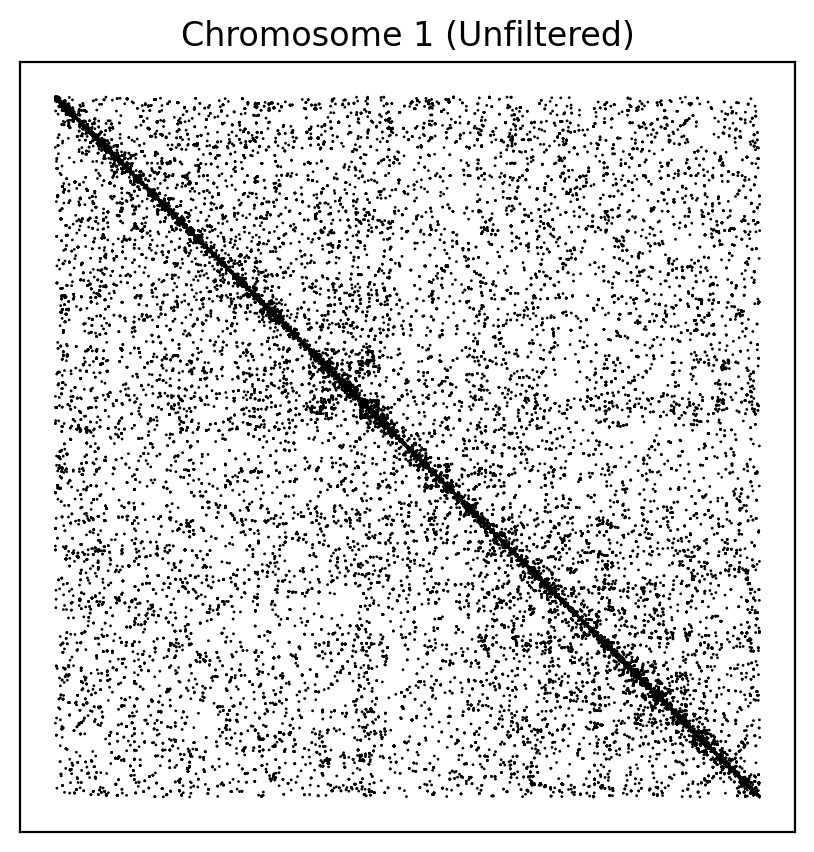

In [5]:
sample_size = len(df)
sample = df.sample(sample_size)

def plot_chromosome_scatter(data, title="Chromosome 2", **kwargs):
    """
    Plots a scatterplot of genomic positions on a specified chromosome,
    mirroring the plot along the diagonal.

    Args:
        data (pandas.DataFrame): DataFrame containing columns 'pos1' and 'pos2' for genomic positions.
        title (str): plot title.
        **kwargs: Additional keyword arguments to pass to `sns.scatterplot`.
    """
    
    default_kwargs = {
        's': 1,        # Marker size
        'c': 'k',      # Marker color (black)
        'ec': 'none',  # No edge color
    }

    # Update default_kwargs with any user-provided kwargs
    default_kwargs.update(kwargs) 
    
    # Create the scatter plots
    sns.scatterplot(data=data, x='pos2', y='pos1', **default_kwargs)
    sns.scatterplot(data=data, x='pos1', y='pos2', **default_kwargs)

    # Customize the plot appearance
    ax = plt.gca()
    ax.set_aspect('auto')
    ax.invert_yaxis()
    ax.set_ylabel("")
    ax.set_xlabel("")

    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title(title)
    plt.show()

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 5, 5
plot_chromosome_scatter(sample, title="Chromosome 1 (Unfiltered)")

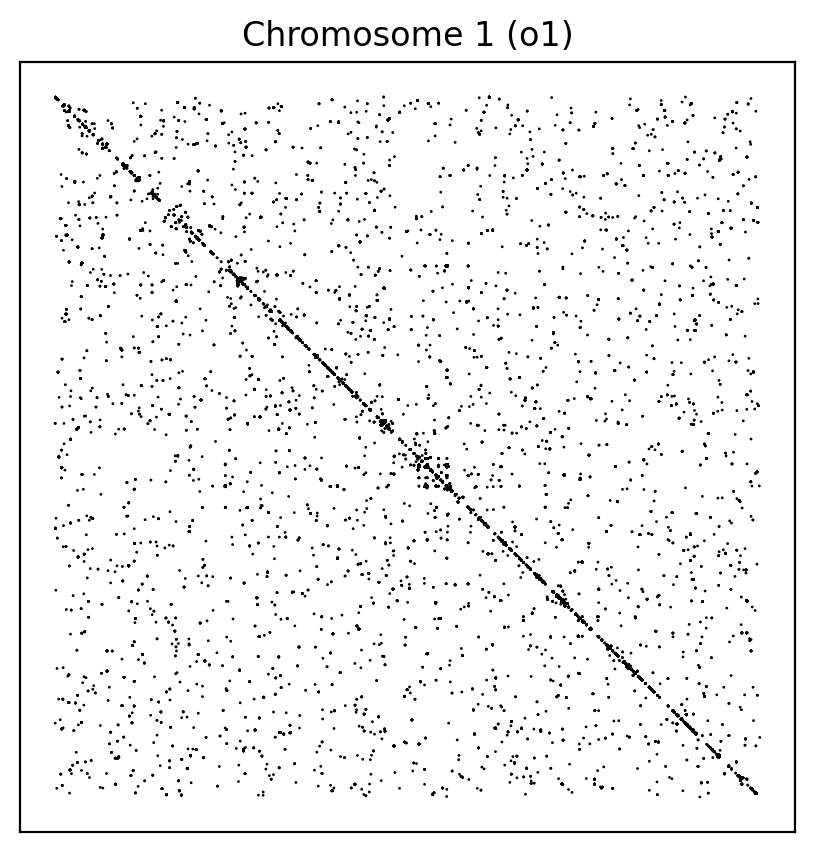

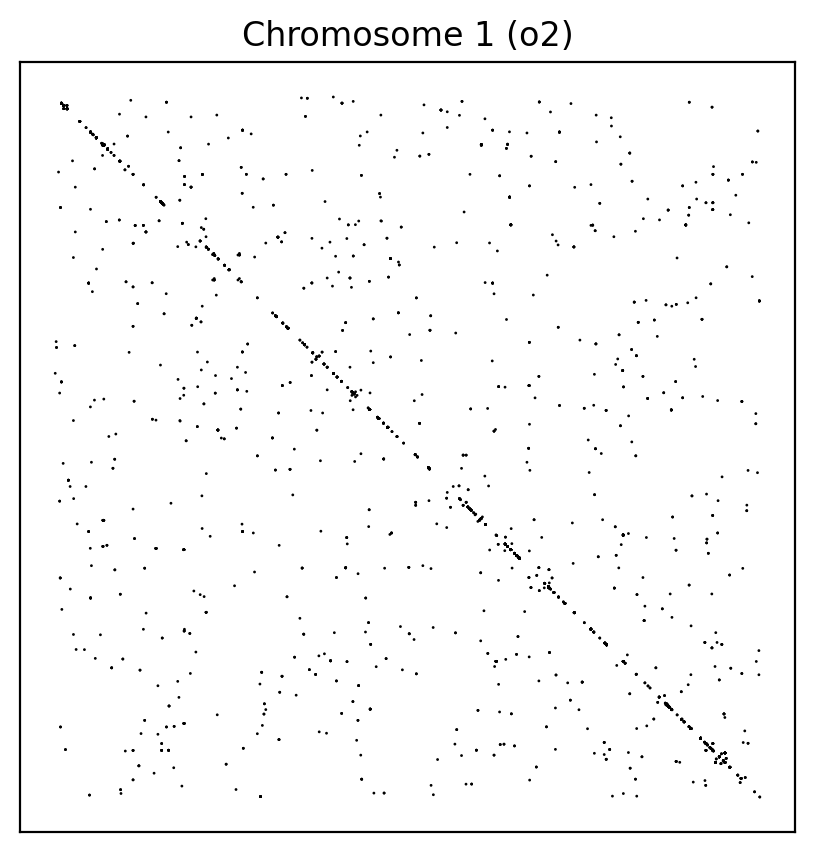

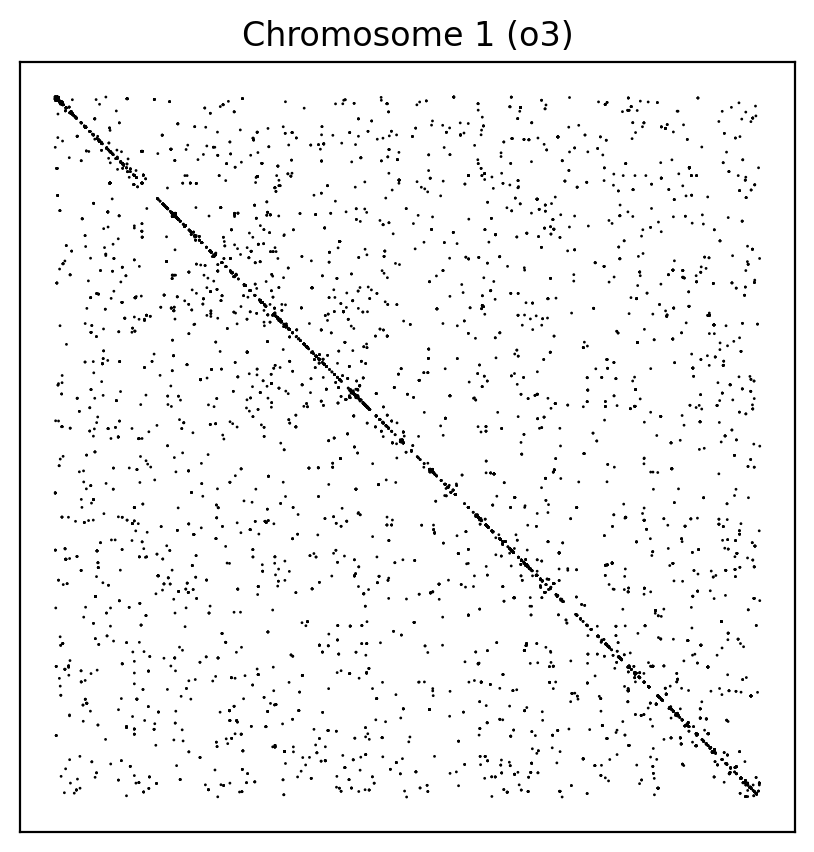

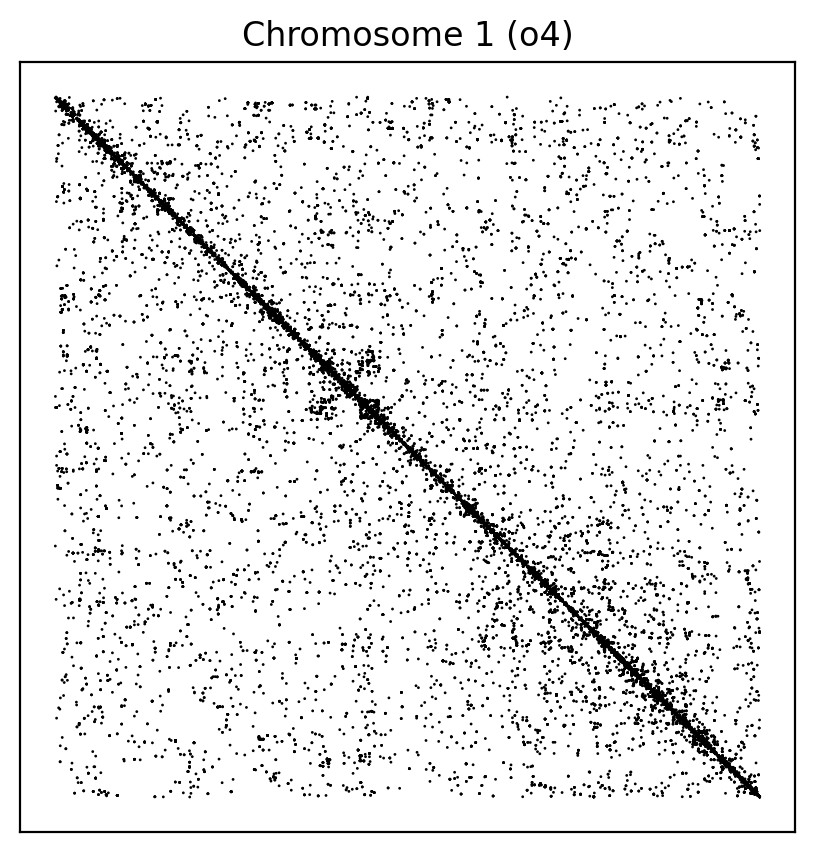

In [6]:
for sample_id, group in df.groupby('sample_id'):
    plot_chromosome_scatter(group, title=f"Chromosome 1 ({sample_id})")

In [7]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

# Compare to Hi-C

In [ ]:
resolution = 1e6
chrom_length = 195154279 # chrom 1
n_bins = np.ceil(chrom_length / resolution)
print(f"{n_bins=}")

df['bin1'] = df['pos1'].apply(lambda x : np.ceil(x / resolution))
df['bin2'] = df['pos2'].apply(lambda x : np.ceil(x / resolution))
print('done')

In [ ]:
fpath = "/scratch/indikar_root/indikar1/shared_data/higher_order/population_hic/chr1_1000000.parquet"
popHic = pd.read_parquet(fpath)
print(f"{popHic.shape=}")
popHic.head()

In [ ]:
def calculate_diagonal_means(matrix):
    """Calculates the mean values from the upper triangular diagonals."""
    diag_means = []
    for offset in range(matrix.shape[0]):  # Only iterate up to the main diagonal
        diag_means.append(np.mean(np.diagonal(matrix, offset=offset)))
    return diag_means


def calculate_diagonal_stds(matrix):
    """Calculates the mean values from the upper triangular diagonals."""
    diag_means = []
    for offset in range(matrix.shape[0]):  # Only iterate up to the main diagonal
        diag_means.append(np.std(np.diagonal(matrix, offset=offset)))
    return diag_means

means = calculate_diagonal_means(popHic.to_numpy())
stds = calculate_diagonal_stds(popHic.to_numpy())

result = []


for _, row in df.iterrows():
    b1 = int(row['bin1'] - 1)
    b2 = int(row['bin2'] - 1)
    
    k = max(b1, b2) - min(b1, b2)
    
    val = popHic.iloc[b1, b2]
    
    record = {
        'file_id' : row['file_id'],
        'cell_id' : row['cell_id'],
        'sample_id' : row['sample_id'],
        'popHic_value' : val,
        'popHic_value_zscore' : (val - means[k]) /  stds[k],
        'bin1' : b1,
        'bin2' : b2,
    }
    
    result.append(record)
    

result = pd.DataFrame(result)
print(f"{result.shape=}")
result = result.sort_values(by='sample_id')
result.head()

In [ ]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 5, 3

sns.kdeplot(data=result,
            x='popHic_value_zscore',
            fill=True,
            hue='sample_id',
            bw_adjust=1.5,
           )

sns.move_legend(plt.gca(),
                title='Sample',
                loc='best')
                
plt.axvline(x=0, lw=1, c="k")    
plt.ylabel('Density')
plt.xlabel('Population Hi-C Z-Score')

# compare to single-cell Hi-C

In [ ]:
fpath = "/scratch/indikar_root/indikar1/shared_data/higher_order/reference/sc_hic_fends.csv"
fends = pd.read_csv(fpath, sep="\t")

resolution = 1e6
chrom = "1"
fends = fends[fends['chr'].astype(str) == chrom]
fends['bin'] =  fends['coord'].apply(lambda x: np.ceil(x / resolution) - 1 )
fends['bin'] = fends['bin'].astype(int)

bin_map = dict(zip(fends['fend'].values, fends['bin'].values))
coord_map = dict(zip(fends['fend'].values, fends['coord'].values))
chrom_map = dict(zip(fends['fend'].values, fends['chr'].values))

fends.head()

In [ ]:
fpath = "/nfs/turbo/umms-indikar/shared/projects/poreC/data/nagano2017/matrices/all_mats/"

sample_size = (96 * 4) - 4

file_list = glob.glob(f"{fpath}*")
file_list = np.random.choice(file_list, sample_size, replace=False)

schic = []

for i, file_path in enumerate(file_list):
    if i % 25 == 0:
        print(f"Processed {i} cells...")
        
    tmp = pd.read_csv(file_path)  
    tmp['bin1'] = tmp['fend1'].apply(lambda x: bin_map.get(x))
    tmp['bin2'] = tmp['fend2'].apply(lambda x: bin_map.get(x))
    
    tmp['pos1'] = tmp['fend1'].apply(lambda x: coord_map.get(x))
    tmp['pos2'] = tmp['fend2'].apply(lambda x: coord_map.get(x))
    
    tmp['chrom1'] = tmp['fend1'].apply(lambda x: chrom_map.get(x))
    tmp['chrom2'] = tmp['fend2'].apply(lambda x: chrom_map.get(x))
    tmp = tmp.dropna()   # Filter rows with NaN after converting

    tmp['file_id'] = os.path.basename(file_path).split(".")[0]
    schic.append(tmp)
    # break

    
schic = pd.concat(schic)
print(f"{schic.shape=}")
schic.head()

In [ ]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 5, 5

plot_chromosome_scatter(schic, title="Chromosome 1 (scHi-C)")

# compare statistically

In [ ]:
stacked = pd.concat([schic[['bin1', 'bin2', 'count']], schic[['bin2', 'bin1', 'count']].rename(columns={'bin2': 'bin1', 'bin1': 'bin2'})])

# 2. Aggregate counts for each bin pair
agg_counts = stacked.groupby(['bin1', 'bin2'], as_index=False)['count'].sum()

# 3. Pivot to create the matrix
matrix = agg_counts.pivot(index='bin1', columns='bin2', values='count').fillna(0)

# 4. Ensure symmetry (in case some bin pairs were missing in one direction)
sym_matrix = matrix + matrix.T - np.diag(np.diag(matrix))

In [ ]:
sym_matrix.head()

In [ ]:
plt.imshow(np.log1p(sym_matrix))

In [ ]:
means = calculate_diagonal_means(sym_matrix.to_numpy())
stds = calculate_diagonal_stds(sym_matrix.to_numpy())

result = []


for _, row in df.iterrows():
    b1 = int(row['bin1'] - 1)
    b2 = int(row['bin2'] - 1)
    
    k = max(b1, b2) - min(b1, b2)
    
    val = popHic.iloc[b1, b2]
    
    record = {
        'file_id' : row['file_id'],
        'cell_id' : row['cell_id'],
        'sample_id' : row['sample_id'],
        'popHic_value' : val,
        'popHic_value_zscore' : (val - means[k]) /  stds[k],
        'bin1' : b1,
        'bin2' : b2,
    }
    
    result.append(record)
    

result = pd.DataFrame(result)
print(f"{result.shape=}")
result = result.sort_values(by='sample_id')
result.head()

In [ ]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 5, 3

sns.kdeplot(data=result,
            x='popHic_value_zscore',
            fill=True,
            hue='sample_id',
            bw_adjust=1.5,
           )

sns.move_legend(plt.gca(),
                title='Sample',
                loc='best')
                
plt.axvline(x=0, lw=1, c="k")    
plt.ylabel('Density')
plt.xlabel('scHi-C Z-Score')

In [ ]:
break

# trans-contacts

In [ ]:
schic.columns

In [ ]:
tmp.head()

In [ ]:
bin_map[0]

In [ ]:
break

In [ ]:
np.ceil(9824484 / resolution)

In [ ]:
pdf.head()

In [ ]:
724767 / (96*4 - 4)

In [ ]:
pdf.head()